In [1]:
import numpy as np
import pandas as pd
import json
from datetime import datetime
from pandas.io.json import json_normalize

In [2]:
# loading cleaned user data
df = pd.read_csv("../data/users_cleaned.csv")


In [13]:
df.head()

,Unnamed: 0,balance,createdAt,locale,objectId,updatedAt,UsesFacebook,UsesGameCenter,TookOffer,MoneySpent,lang,country,DaysPlayed
0,0,9881,2015-01-20T17:40:31.841Z,zh-Hans,bmTaQ1p2B6,2015-03-05T11:33:03.600Z,0,0,0,1.99,zh,CN,43
1,1,0,2015-01-21T06:56:54.947Z,en_US,BhCQlVzeFz,2015-01-21T06:56:54.947Z,0,0,0,0.00,en,US,0
2,2,0,2015-01-21T08:24:53.387Z,en_US,1clQzyY4OX,2015-01-21T08:24:53.387Z,0,0,0,0.00,en,US,0
3,3,0,2015-01-21T08:25:07.292Z,en_US,JE1vOwu2mY,2015-01-21T08:25:07.292Z,0,0,0,0.00,en,US,0
4,4,0,2015-01-21T08:26:33.767Z,en_US,JBIaF8WpN7,2015-01-21T08:26:33.767Z,0,0,0,0.00,en,US,0


In [14]:
# Proportion of users that uses Facebook
# Proportion of users that uses GameCenter

print "Proportion of users that uses Facebook: %f" % (df['UsesFacebook'].sum().astype(float) / len(df['UsesFacebook']))
print "Proportion of users that uses GameCenter: %f" % (df['UsesGameCenter'].sum().astype(float) / len(df['UsesGameCenter']))

Proportion of users that uses Facebook: 0.006580
Proportion of users that uses GameCenter: 0.137291


In [15]:
from __future__ import division

# Percentage of paying users
payingUsersCount = len(df[df['MoneySpent']>0])
nonPayingUsersCount = len(df[df['MoneySpent']==0.])

print "Number of paying users: %s" % payingUsersCount
print "Number of non-paying users: %s" % nonPayingUsersCount
print "Percentage of paying users: %f" % (payingUsersCount / nonPayingUsersCount)

Number of paying users: 2670
Number of non-paying users: 438684
Percentage of paying users: 0.006086


NameError: name 'plt' is not defined

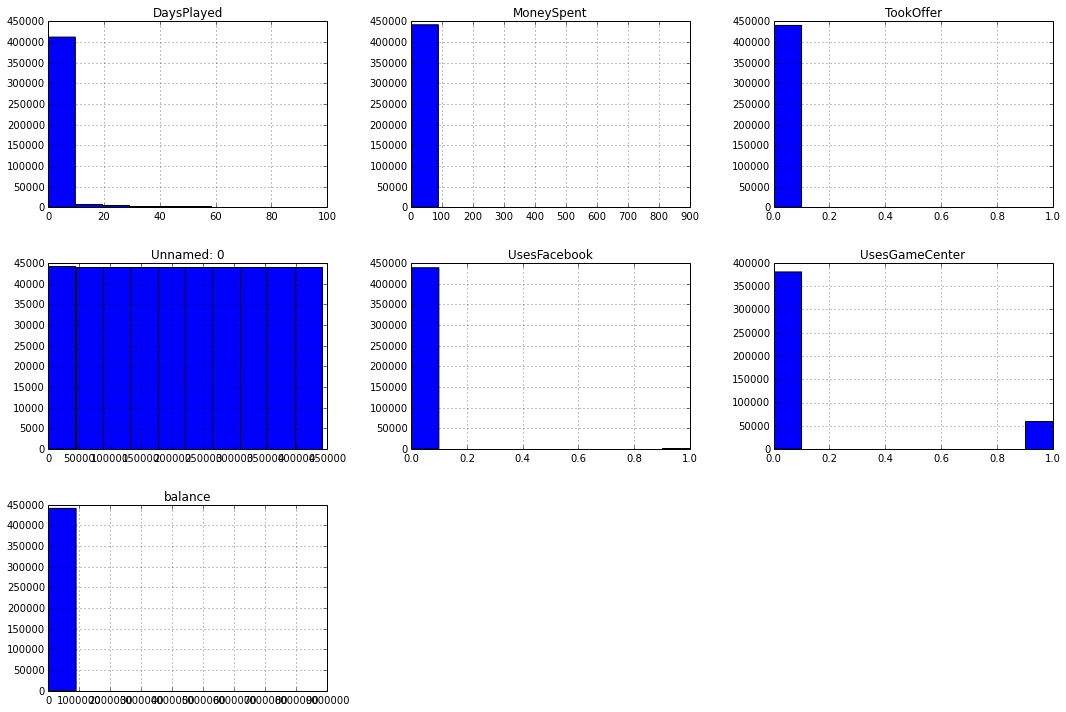

In [16]:
%matplotlib inline

df.hist(figsize=(18,12))
plt.show()

# Very small percentage of paying users


In [22]:
df_paid = df.loc[df.MoneySpent>0]

In [24]:
df_paid.describe()

,Unnamed: 0,balance,UsesFacebook,UsesGameCenter,TookOffer,MoneySpent,DaysPlayed
count,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000
mean,306527.314232,228.446442,0.008614,0.467416,0.606742,12.405352,20.784270
std,102937.896057,1136.342074,0.092430,0.499031,0.488565,30.129375,23.445606
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.990000,0.000000
25%,268525.750000,9.000000,0.000000,0.000000,0.000000,1.990000,3.000000
50%,326206.000000,44.000000,0.000000,0.000000,1.000000,4.990000,12.000000
75%,380587.500000,164.000000,0.000000,1.000000,1.000000,10.960000,31.000000
max,441124.000000,38093.000000,1.000000,1.000000,1.000000,884.070000,97.000000


In [27]:
# Load transaction data

df_purchases = pd.read_csv("../data/IAP_cleaned.csv")

In [30]:
df_purchases.head()

,Unnamed: 0,balance,cost,createdAt,objectId,product,updatedAt,user.objectId
0,0,12064,1.99,2015-03-05T10:21:59.304Z,DZgADJNFaG,hk.siuyiu.item.crystal1,2015-03-05T10:21:59.304Z,bmTaQ1p2B6
1,1,150,1.99,2015-03-13T10:11:46.155Z,p01j4QpYZf,hk.siuyiu.item.crystal1.new,2015-03-13T10:11:46.155Z,Da74nWLXNm
2,2,52,1.99,2015-03-13T11:40:15.665Z,AGuHX5iJv9,hk.siuyiu.item.crystal1,2015-03-13T11:40:15.665Z,PzruNp3hqk
3,3,3,1.99,2015-03-13T11:43:10.129Z,kPzmBUWW77,hk.siuyiu.item.crystal1,2015-03-13T11:43:10.129Z,06J9V5jkEO
4,4,120,1.99,2015-03-13T11:45:19.904Z,oZIVnH8JoH,hk.siuyiu.item.crystal1,2015-03-13T11:45:19.904Z,06J9V5jkEO


In [32]:
# Record of virtual currency spending behavior per user
df_spend = pd.read_csv("../data/spend_cleaned.csv")

In [34]:
df_spend.head()

,Unnamed: 0,balance,createdAt,crystals,name,updatedAt,user.objectId
0,0,1441,2015-03-05T10:12:48.621Z,34,Hurry Breeding,2015-03-05T10:12:48.621Z,bmTaQ1p2B6
1,1,2371,2015-03-05T10:17:54.682Z,25,Buy Wool Insta-Grow,2015-03-05T10:17:54.682Z,bmTaQ1p2B6
2,2,12179,2015-03-05T11:20:22.153Z,35,Hurry Breeding,2015-03-05T11:20:22.153Z,bmTaQ1p2B6
3,3,12144,2015-03-05T11:20:38.054Z,35,Hurry Breeding,2015-03-05T11:20:38.054Z,bmTaQ1p2B6
4,4,12109,2015-03-05T11:20:47.516Z,35,Hurry Breeding,2015-03-05T11:20:47.516Z,bmTaQ1p2B6
